## **Library and Data Imports**



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report

In [3]:
from google.colab import drive
from IPython.display import clear_output
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/32bitdata/bitsDataset.csv")
df.shape

(4100668, 34)

In [5]:
bitsCols = []
for i in range(31,-1,-1):
      bitsCols.append('Bit {}'.format(i))
X = df.loc[:, bitsCols]
Y = df.loc[:, 'Class']

**67% Train - 33% Test Split**

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

## **Classifiers**

### Decision Tree

In [6]:
clfDT = DecisionTreeClassifier(criterion="entropy", max_depth=32, min_samples_split=0.005, random_state= 0)
clfDT = clfDT.fit(X_train, y_train)
y_test_pred_DT =clfDT.predict(X_test)

In [7]:
print(classification_report(y_test, y_test_pred_DT))

              precision    recall  f1-score   support

         Big       0.86      0.84      0.85    676943
       Small       0.85      0.86      0.85    676278

    accuracy                           0.85   1353221
   macro avg       0.85      0.85      0.85   1353221
weighted avg       0.85      0.85      0.85   1353221



If we want to export the trained tree

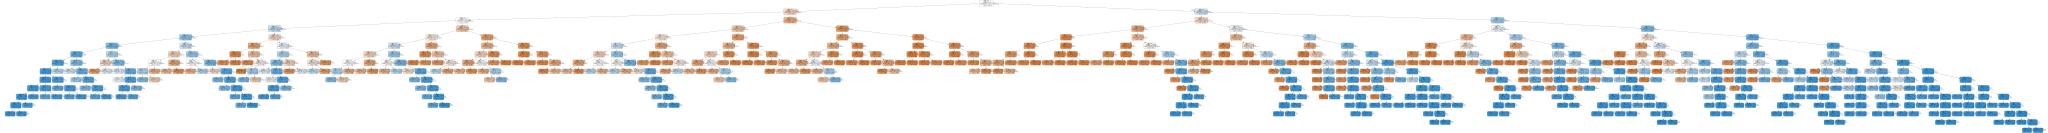

In [8]:
dot_data = export_graphviz(clfDT, out_file = None, feature_names = X.axes[1], class_names =clfDT.classes_, filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)
graph.format = 'pdf'
graph.render('graphicBitsDT',view=True)
graph

### Logistic Regression

In [10]:
clfLR = LogisticRegression(random_state=333).fit(X_train, y_train)
y_test_pred_LR = clfLR.predict(X_test)

In [11]:
print(classification_report(y_test, y_test_pred_LR))

              precision    recall  f1-score   support

         Big       0.66      0.66      0.66    676943
       Small       0.66      0.66      0.66    676278

    accuracy                           0.66   1353221
   macro avg       0.66      0.66      0.66   1353221
weighted avg       0.66      0.66      0.66   1353221



### Small MLPs
Training and testing for different topologies and regularization parameter values in small MLPs.

In [7]:
regul_param_range = 10.0 ** -np.arange(1, 7) 
scores_train = [[],[],[],[]]
scores_test = [[],[],[],[]]

for regul_param in regul_param_range:
    clf1=MLPClassifier(hidden_layer_sizes=(20, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state = 333).fit(X_train, y_train.ravel())
    clf2=MLPClassifier(hidden_layer_sizes=(10, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state = 333).fit(X_train, y_train.ravel())
    clf3=MLPClassifier(hidden_layer_sizes=(10,10, ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state = 333).fit(X_train, y_train.ravel())
    clf4=MLPClassifier(hidden_layer_sizes=(10,10,10 ), activation='relu', solver='adam', alpha=regul_param, batch_size='auto', 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state = 333).fit(X_train, y_train.ravel())

    scores_train[0].append(accuracy_score(y_train, clf1.predict(X_train)))
    scores_train[1].append(accuracy_score(y_train, clf2.predict(X_train)))
    scores_train[2].append(accuracy_score(y_train, clf3.predict(X_train)))
    scores_train[3].append(accuracy_score(y_train, clf4.predict(X_train)))

    scores_test[0].append(accuracy_score(y_test, clf1.predict(X_test)))
    scores_test[1].append(accuracy_score(y_test, clf2.predict(X_test)))
    scores_test[2].append(accuracy_score(y_test, clf3.predict(X_test)))
    scores_test[3].append(accuracy_score(y_test, clf4.predict(X_test)))
  

Printing the experiments results.

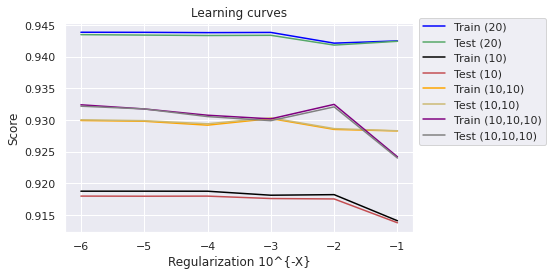

In [8]:
fig = plt.figure()
ax = plt.subplot(111)

plt.plot(np.log10(regul_param_range), scores_train[0], color="blue", label="Train (20)")
plt.plot(np.log10(regul_param_range), scores_test[0], color="g", label="Test (20)")

plt.plot(np.log10(regul_param_range), scores_train[1], color="black", label="Train (10)")
plt.plot(np.log10(regul_param_range), scores_test[1], color="r", label="Test (10)")

plt.plot(np.log10(regul_param_range), scores_train[2], color="orange", label="Train (10,10)")
plt.plot(np.log10(regul_param_range), scores_test[2], color="y", label="Test (10,10)")

plt.plot(np.log10(regul_param_range), scores_train[3], color="purple", label="Train (10,10,10)")
plt.plot(np.log10(regul_param_range), scores_test[3], color="grey", label="Test (10,10,10)")

# Creamos el gráfico
plt.title("Learning curves")
plt.xlabel("Regularization 10^{-X}"), plt.ylabel("Score"), plt.legend(loc="best")
plt.tight_layout()
ax.legend(bbox_to_anchor=(1, 1.05))
plt.savefig('learning curves.pdf', bbox_inches="tight")
plt.show()